In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc

In [ ]:
df=pd.read_csv("Smart Lavatory System.csv")

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['VOC']= label_encoder.fit_transform(df['VOC'])

df['VOC'].unique()
df

,Time Stamp,No. of Users(IR),Gas Sensor(MQ137)-ppm,Gas Sensor(MQ4)-ppm,Gas Sensor(MQ8)-ppm,Luminosity(lux),VOC,Temperature(DHT22)(in deg. celsius),Humidity(RH)%
0,6/1/2024 0:00,9,421.48,5643.20,145.49,5139.34,1,46,63
1,6/1/2024 1:00,11,335.97,4809.50,467.19,2232.15,0,-35,27
2,6/1/2024 2:00,8,94.51,1341.14,536.35,6733.12,1,-40,32
3,6/1/2024 3:00,17,413.89,9646.05,462.77,9911.95,1,46,51
4,6/1/2024 4:00,2,465.02,4173.87,947.75,303.50,1,-2,60
...,...,...,...,...,...,...,...,...,...
715,6/30/2024 19:00,7,434.45,9093.44,887.38,1262.96,0,18,74
716,6/30/2024 20:00,6,129.50,7781.27,358.99,5805.65,0,-23,20
717,6/30/2024 21:00,16,281.75,1746.86,524.76,3649.95,1,45,45
718,6/30/2024 22:00,10,48.87,3753.79,302.09,85.51,1,41,56


In [ ]:
def set_values(row):
    if row['No. of Users(IR)'] > 12 or row['Gas Sensor(MQ137)-ppm'] > 100 or row['Gas Sensor(MQ4)-ppm'] > 500 or row['Gas Sensor(MQ8)-ppm'] > 500 or row['VOC']==1 or 20 <= row['Temperature(DHT22)(in deg. celsius)'] <= 24 or 30 <= row['Humidity(RH)%'] <= 60:
        return '1'

    else:
        return '0'

df['Cleaniness'] = df.apply(set_values, axis=1)
df[100:200]

,Time Stamp,No. of Users(IR),Gas Sensor(MQ137)-ppm,Gas Sensor(MQ4)-ppm,Gas Sensor(MQ8)-ppm,Luminosity(lux),VOC,Temperature(DHT22)(in deg. celsius),Humidity(RH)%,Cleaniness
100,6/5/2024 4:00,19,66.43,877.33,155.64,2640.10,1,45,4,1
101,6/5/2024 5:00,19,411.05,1501.43,153.70,638.88,0,24,54,1
102,6/5/2024 6:00,17,302.83,9440.14,500.05,5088.95,0,15,24,1
103,6/5/2024 7:00,20,415.28,9880.37,359.05,2508.98,1,61,50,1
104,6/5/2024 8:00,13,327.14,8764.40,650.12,5510.76,0,0,21,1
...,...,...,...,...,...,...,...,...,...,...
195,6/9/2024 3:00,12,381.89,7516.65,185.91,4098.27,0,16,29,1
196,6/9/2024 4:00,6,41.77,918.66,444.03,5447.24,0,50,91,1
197,6/9/2024 5:00,10,337.75,6098.90,531.82,5646.17,0,52,40,1
198,6/9/2024 6:00,8,56.36,206.35,487.25,4975.05,0,1,15,0


In [ ]:
df['Cleaniness'] = df['Cleaniness'].astype(int)

X = df[['Gas Sensor(MQ137)-ppm', 'Gas Sensor(MQ4)-ppm', 'Gas Sensor(MQ8)-ppm', 'VOC','Temperature(DHT22)(in deg. celsius)', 'Humidity(RH)%']]
y = df['Cleaniness']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (576, 1, 6)
X_test shape: (144, 1, 6)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 6)))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))



optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11451 (44.73 KB)
Trainable params: 11451 (44.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=300, batch_size=20, validation_split=0.2, verbose=1)


Epoch 1/300
23/23 [==============================] - 7s 64ms/step - loss: 0.6693 - accuracy: 0.7935 - val_loss: 0.6392 - val_accuracy: 0.9741
Epoch 2/300
23/23 [==============================] - 1s 31ms/step - loss: 0.6101 - accuracy: 0.9826 - val_loss: 0.5825 - val_accuracy: 0.9741
Epoch 3/300
23/23 [==============================] - 1s 25ms/step - loss: 0.5513 - accuracy: 0.9826 - val_loss: 0.5242 - val_accuracy: 0.9741
Epoch 4/300
23/23 [==============================] - 0s 8ms/step - loss: 0.4899 - accuracy: 0.9826 - val_loss: 0.4629 - val_accuracy: 0.9741
Epoch 5/300
23/23 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.9826 - val_loss: 0.3990 - val_accuracy: 0.9741
Epoch 6/300
23/23 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.9826 - val_loss: 0.3371 - val_accuracy: 0.9741
Epoch 7/300
23/23 [==============================] - 0s 5ms/step - loss: 0.2975 - accuracy: 0.9826 - val_loss: 0.2803 - val_accuracy: 0.9741
Epoch 8/30

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Accuracy: {accuracy*100:.2f}%')

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print(f'Predicted: {y_pred.flatten()}')
print(f'Actual: {y_test.values}')


Train Accuracy: 99.83%
Test Accuracy: 98.61%
5/5 [==============================] - 0s 4ms/step
Predicted: [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual: [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test is in the form of a numpy array or pandas Series
rmse = np.sqrt(mean_squared_error(y_test.values, y_pred.flatten()))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.12


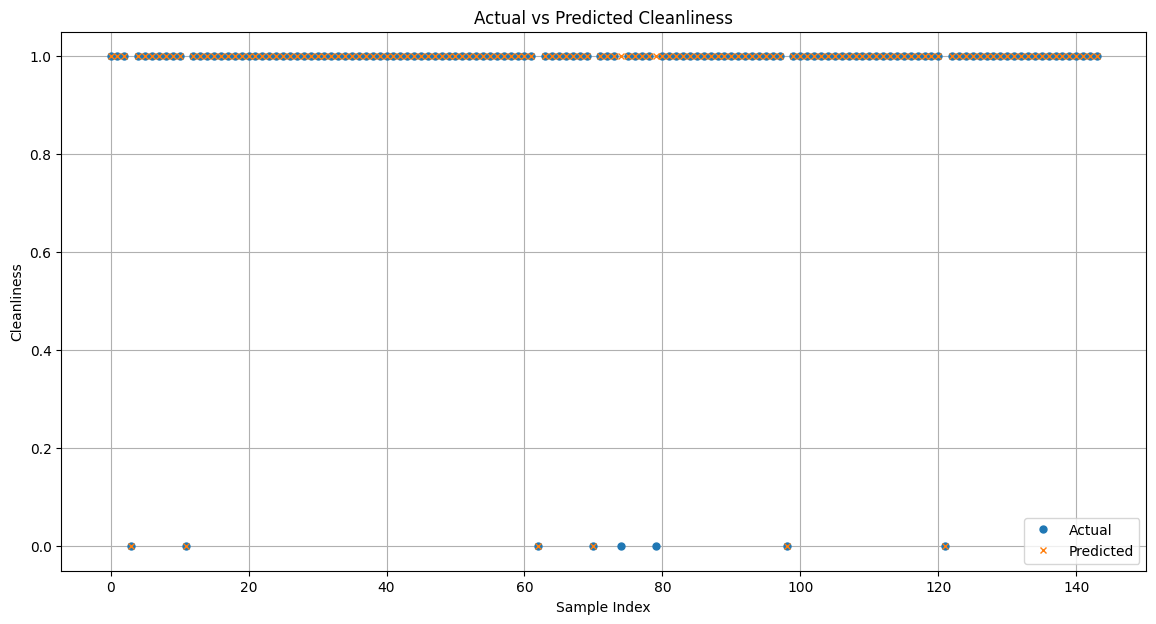

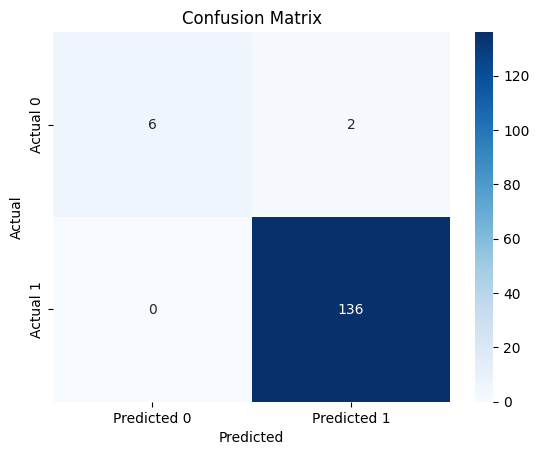

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.99      1.00      0.99       136

    accuracy                           0.99       144
   macro avg       0.99      0.88      0.92       144
weighted avg       0.99      0.99      0.99       144



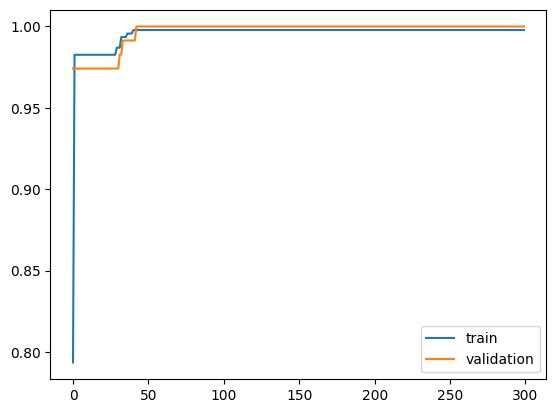

In [ ]:
# plt.figure(figsize=(14, 7))
# plt.plot(range(len(y_test)), y_test.values, label='Actual')
# plt.plot(range(len(y_test)), y_pred.flatten(), label='Predicted')
# plt.title('Actual vs Predicted Cleanliness')
# plt.xlabel('Sample Index')
# plt.ylabel('Cleanliness')
# plt.legend()
# plt.grid(True)
# plt.show()
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.values

# Plotting a side-by-side comparison of predicted and actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_flat, label='Actual', marker='o', linestyle='', markersize=5)
plt.plot(y_pred_flat, label='Predicted', marker='x', linestyle='', markersize=5)
plt.title('Actual vs Predicted Cleanliness')
plt.xlabel('Sample Index')
plt.ylabel('Cleanliness')
plt.legend()
plt.grid(True)
plt.show()

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test_flat, y_pred_flat))

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.savefig('accuracy_plot.png')
plt.show()



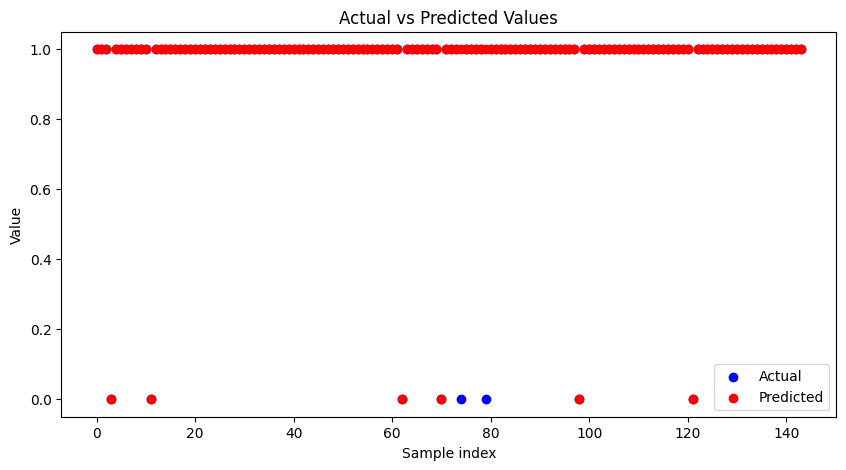

In [ ]:

y_test_flat = y_test.values.flatten()
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_flat)), y_test_flat, color='blue', label='Actual')
plt.scatter(range(len(y_test_flat)), y_pred.flatten(), color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.legend()
plt.savefig('actual_vs_predicted.png')
plt.show()

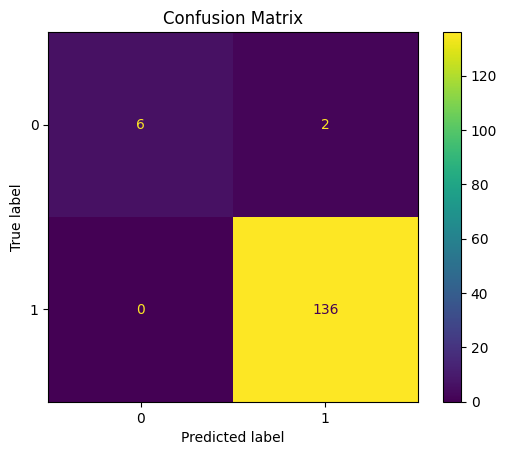

In [ ]:
cm = confusion_matrix(y_test_flat, y_pred.flatten())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

plt.show()